In [361]:
import pandas as pd 
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [362]:
customerdf = pd.read_csv("Customer Acqusition.csv")
repaymentdf = pd.read_csv("Repayment.csv")
spenddf = pd.read_csv("spend.csv")

In [363]:
customerdf.head(4)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt


In [364]:
repaymentdf.head(4)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN


In [365]:
spenddf.head(4)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47


## question1a

In [371]:
finaldf.loc[finaldf['Age']<18,'Age'] = finaldf.Age.mean()

## question1b

In [366]:
finaldf = pd.merge(repaymentdf, spenddf,left_on =["Customer","Month"],right_on=["Customer","Month"])

In [367]:
finaldf = pd.merge(customerdf,finaldf,left_on=["Customer"],right_on=["Customer"])

In [368]:
finaldf.rename(columns = {"Amount_x":"repayment","Amount_y":"spend"},inplace = True)


In [369]:
finaldf.drop("Unnamed: 4",axis = 1,inplace = True)

In [370]:
finaldf.spend.where(finaldf.spend < finaldf.Limit, finaldf.Limit*0.5,inplace = True)

## question1c

In [372]:
finaldf.repayment.where(finaldf.repayment < finaldf.Limit, finaldf.Limit,inplace = True)

## question2a

In [373]:
finaldf.Customer.nunique()

100

## question2b

In [374]:
finaldf.Type.nunique()

15

## question2c

In [375]:
finaldf.Month=pd.to_datetime(finaldf.Month)
finaldf.groupby(finaldf.Month.dt.month)["spend"].mean()

Month
1     156696.561346
2     168160.766875
3     153823.233551
4     106669.386042
5     140163.140250
6     152516.016667
7     131528.999286
8     157471.529231
9     185289.655385
10    173389.103333
11    175381.810000
12    205455.595556
Name: spend, dtype: float64

## question2d

In [376]:
finaldf.groupby(finaldf.Month.dt.month)["repayment"].mean()

Month
1     169903.063483
2     184598.047708
3     160066.046075
4     144771.002292
5     201434.544125
6     145935.214762
7     181983.595000
8     158626.298462
9     193521.688462
10    229523.976667
11    240113.253462
12    237981.383333
Name: repayment, dtype: float64

## question2e

In [377]:
finaldf

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,repayment,Sl No:,Type,spend
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,2004-01-12,495414.75,1,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,2004-01-12,495414.75,103,TRAIN TICKET,440563.22
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,103.0,2004-01-12,350446.82,1,JEWELLERY,485470.80
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,103.0,2004-01-12,350446.82,103,TRAIN TICKET,440563.22
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,2004-01-03,245899.02,2,PETRO,410556.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98.0,2004-01-25,100000.00,98,BIKE,54729.66
859,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99.0,2004-01-12,10000.00,99,AUTO,5000.00
860,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100.0,2004-01-03,10001.00,100,SHOPPING,5000.50
861,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101.0,2004-01-15,10002.00,101,AIR TICKET,5001.00


In [378]:
 tempdf = finaldf.groupby([finaldf.Month.dt.year,finaldf.Month.dt.month])["spend","repayment"].sum()

In [379]:
tempdf["monthly_profit"] = tempdf["repayment"] -tempdf["spend"]

In [380]:
x= tempdf.monthly_profit.where(tempdf.monthly_profit>0,0)
x*0.029

Month  Month
2004   1        160075.85097
       2             0.00000
       3          2414.56407
       4          3251.08589
       5         19841.43779
       9             0.00000
       11         5515.07616
2005   1             0.00000
       2         62585.90891
       4         11906.63179
       5         74422.81455
       6             0.00000
       7          9416.76516
       8           325.15670
       9             0.00000
       10        13175.54274
       11        21695.29063
       12        11200.31533
2006   1          7103.03786
       2         13402.68495
       3         16956.88319
       4         37879.73214
       5         47885.40465
       6          6513.58473
       7         11067.80070
       8           110.19130
       9         15751.55996
       10         1475.65920
       11        21597.14158
       12            0.00000
Name: monthly_profit, dtype: float64

In [381]:
temp2df = finaldf.groupby([finaldf.Month.dt.month])["spend","repayment"].sum()
temp2df["monthly_profit"] = temp2df["repayment"] -temp2df["spend"]
x2= temp2df.monthly_profit.where(temp2df.monthly_profit>0,0)
x2*0.029

Month
1     145152.66499
2      68642.08476
3      19371.44726
4      53037.44982
5     142149.65699
6          0.00000
7      20484.56586
8        435.34800
9       3103.47647
10     14651.20194
11     48807.50837
12      8489.23061
Name: monthly_profit, dtype: float64

## question2f

In [382]:
finaldf.groupby("Type")["spend"].sum().sort_values(ascending = False)[0:5]

Type
CAMERA          19943003.00
PETRO           13667106.67
FOOD            12888728.98
BUS TICKET      11449175.92
MOVIE TICKET    10123108.77
Name: spend, dtype: float64

## question2g

In [383]:
finaldf.groupby("City")["spend"].sum().sort_values(ascending = False)

City
COCHIN        27653817.49
BANGALORE     26800219.96
CALCUTTA      26677187.59
BOMBAY        18806631.04
CHENNAI       10039376.90
TRIVANDRUM     8967235.19
DELHI          8324392.47
PATNA          6596221.37
Name: spend, dtype: float64

## question2h

In [384]:
finaldf.groupby("Age")["spend"].sum().sort_values(ascending = False).head(3)

Age
28.00000    17867408.74
43.94438    11688570.55
78.00000     8281014.70
Name: spend, dtype: float64

## question2i

In [385]:
finaldf.groupby("Customer")["repayment"].sum().sort_values(ascending = False)[0:10]

Customer
A60    10428573.54
A61     8617285.78
A44     8227149.65
A43     7963202.15
A45     7075094.55
A13     6479204.24
A38     6404899.90
A42     6181774.14
A41     5667620.30
A39     5534957.87
Name: repayment, dtype: float64

## question3

In [386]:
cityspend = finaldf.groupby(["City","Product",finaldf.Month.dt.year])["spend"].sum()

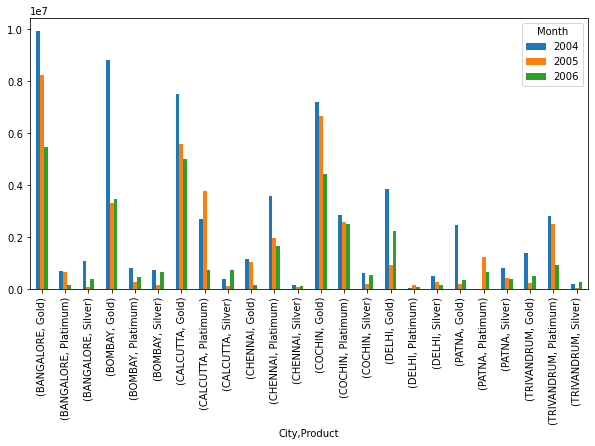

In [387]:
cityspend.unstack().plot.bar(figsize=(10,5))

## question4a

In [388]:
cms = finaldf.groupby(["City",finaldf.Month.dt.month])["spend"].sum()

Text(0, 0.5, 'Amount Spend')

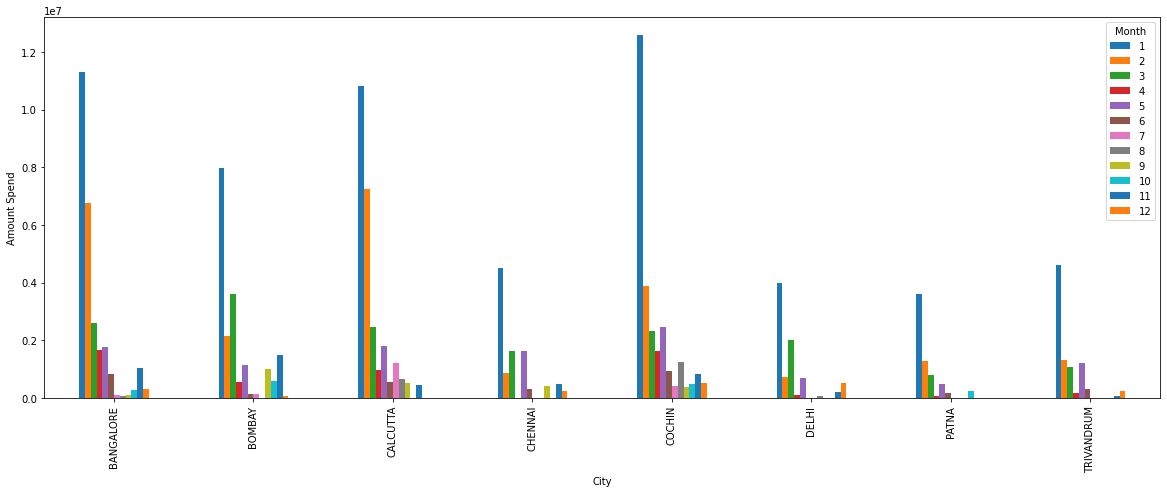

In [389]:
cms.unstack().plot.bar(figsize=(20,7))
plt.ylabel("Amount Spend")

## question4b

In [390]:
cms = finaldf[finaldf.Type == 'AIR TICKET'].groupby([finaldf.Month.dt.year])["spend"].sum()

Text(0.5, 1.0, 'Air Tickets')

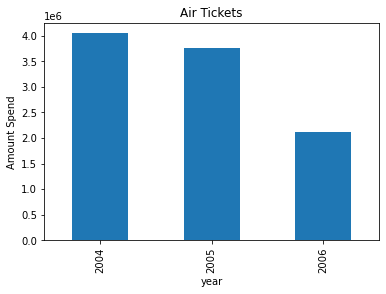

In [391]:
cms.plot.bar()
plt.xlabel("year")
plt.ylabel("Amount Spend")
plt.title("Air Tickets")

## question4c

In [392]:
pmsg = finaldf[finaldf["Product"]=="Gold"].groupby([finaldf.Month.dt.month])["spend"].sum()
pmsp = finaldf[finaldf["Product"]=="Platimum"].groupby([finaldf.Month.dt.month])["spend"].sum()
pmss = finaldf[finaldf["Product"]=="Silver"].groupby([finaldf.Month.dt.month])["spend"].sum()


Text(0.5, 1.0, 'Gold')

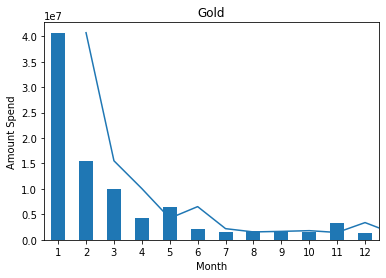

In [393]:
pmsg.plot(kind='bar')
pmsg.plot(kind = 'line')
plt.ylabel("Amount Spend")
plt.title("Gold")

Text(0.5, 1.0, 'Platinum')

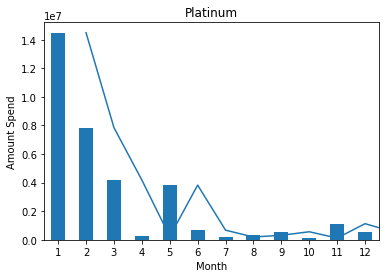

In [394]:
pmsp.plot(kind='bar')
pmsp.plot(kind ='line')
plt.ylabel("Amount Spend")
plt.title("Platinum")

Text(0.5, 1.0, 'Silver')

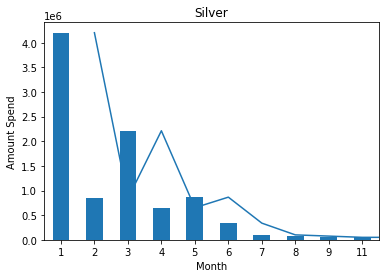

In [395]:
pmss.plot(kind='bar')
pmss.plot(kind = 'line')
plt.ylabel("Amount Spend")
plt.title("Silver")

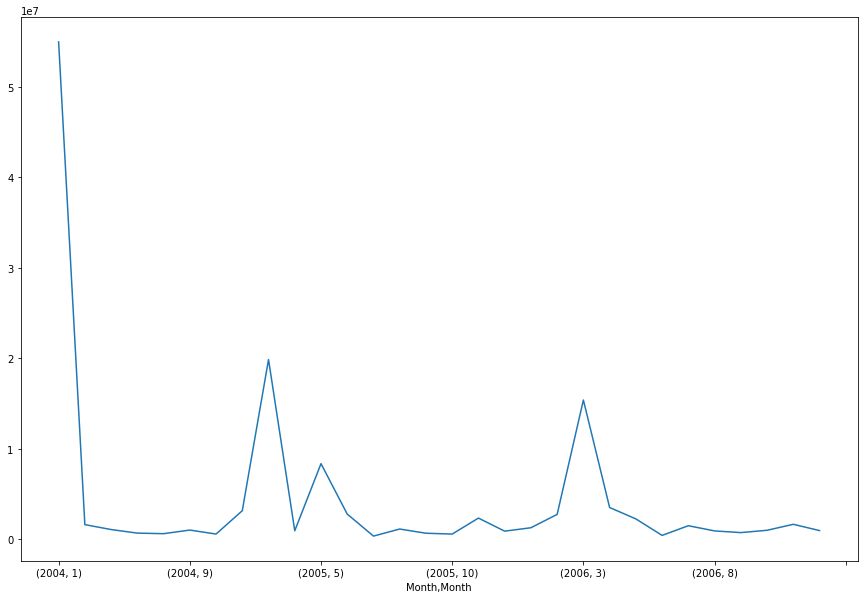

In [396]:
x=finaldf.groupby([finaldf.Month.dt.year,finaldf.Month.dt.month])["spend"].sum()
x.plot(figsize=(15,10))

## question5

In [453]:
def top10cust(finaldf1):
    prod = str(input("enter product type:"))
    period = int(input("enter the year(yyyy) or month(mm):"))
    finaldf1 = finaldf1[(finaldf1.Month.dt.month == period)|(finaldf1.Month.dt.year == period)]
    x=finaldf1[finaldf1.Product == prod].groupby(["City","Customer"])["repayment"].sum()
    x=pd.DataFrame(x)
    y=x.groupby(["City","Customer"])["repayment"].nlargest(10)
    print(y)
    

    

In [454]:
p =top10cust(finaldf)


enter product type:Gold
enter the year(yyyy) or month(mm):2
City       Customer  City       Customer
BANGALORE  A1        BANGALORE  A1          1056512.48
           A13       BANGALORE  A13         3103175.79
           A14       BANGALORE  A14         2262375.03
           A30       BANGALORE  A30           67056.51
           A43       BANGALORE  A43         1248059.20
BOMBAY     A12       BOMBAY     A12         1615841.00
           A42       BOMBAY     A42          930880.75
           A62       BOMBAY     A62          113317.83
CALCUTTA   A10       CALCUTTA   A10          227778.83
           A15       CALCUTTA   A15          322123.69
           A31       CALCUTTA   A31          899856.54
           A60       CALCUTTA   A60         1295431.18
COCHIN     A11       COCHIN     A11          743261.55
           A16       COCHIN     A16          280785.41
           A45       COCHIN     A45          832647.23
           A61       COCHIN     A61         1345911.54
DELHI      A44     